In [1]:
!pip install xgboost scikit-learn pandas matplotlib


In [2]:
import pandas as pd

# Load the dataset
file_path = 'braking_system_rul_dataset.csv'  # Replace this with the actual path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check it
print(data.head())


   Brake Pad Wear Level  Brake Fluid Pressure  \
0              0.599343              0.509219   
1              0.472347              0.613961   
2              0.629538              0.658639   
3              0.804606              0.888769   
4              0.453169              0.755655   

   Temperature of Brake Components  Vibration Data  Brake Response Time  \
0                         0.432888        0.553080             0.617481   
1                         0.505360        0.614683             0.312102   
2                         0.458691        0.499738             0.467220   
3                         0.517801        0.011500             0.495834   
4                         0.567877        0.368916             0.501591   

   Vehicle Speed During Braking  ABS Activation Frequency       RUL  
0                      0.578487                  0.332184  0.526214  
1                      0.595102                  0.221864  0.526656  
2                      0.609644             

In [3]:
# Check for any missing values
print(data.isnull().sum())

# Basic statistics for numerical columns
print(data.describe())

# Splitting features (X) and target (y)
X = data.drop('RUL', axis=1)  # Features: all columns except 'RUL'
y = data['RUL']  # Target: 'RUL'


Brake Pad Wear Level               0
Brake Fluid Pressure               0
Temperature of Brake Components    0
Vibration Data                     0
Brake Response Time                0
Vehicle Speed During Braking       0
ABS Activation Frequency           0
RUL                                0
dtype: int64
       Brake Pad Wear Level  Brake Fluid Pressure  \
count           3000.000000           3000.000000   
mean               0.506224              0.696153   
std                0.194886              0.100812   
min                0.000000              0.382330   
25%                0.374492              0.628744   
50%                0.504873              0.697771   
75%                0.634718              0.763866   
max                1.000000              1.000000   

       Temperature of Brake Components  Vibration Data  Brake Response Time  \
count                      3000.000000     3000.000000          3000.000000   
mean                          0.600262        0.397780 

In [4]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from xgboost import XGBRegressor

# Initialize the model with common hyperparameters
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of a tree
    random_state=42
)

# Train the model on the training set
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 0.0437900508537842
R² Score: 0.9283602747269218


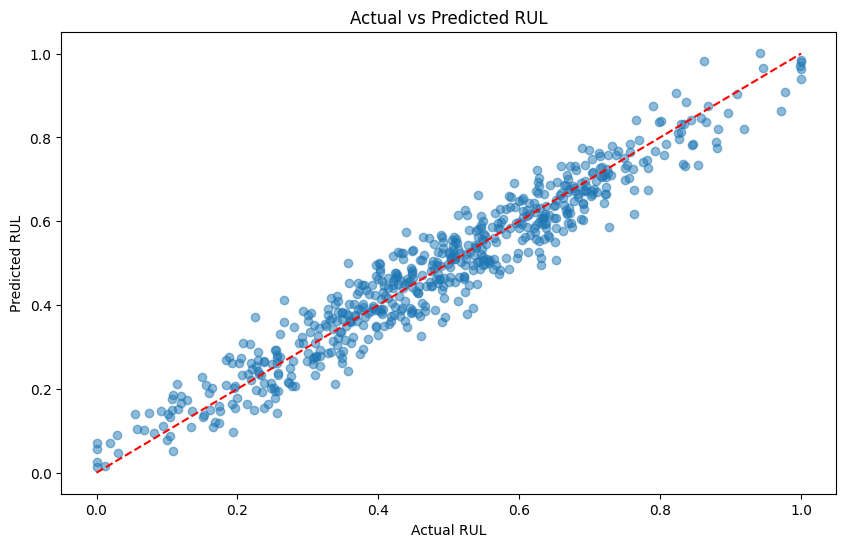

In [7]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb


In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [10]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # or 'neg_mean_absolute_error' for MAE
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [11]:
# Print the best hyperparameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score achieved during tuning
print("Best R² Score during tuning:", grid_search.best_score_)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 1.0}
Best R² Score during tuning: 0.939059679311216


In [12]:
# Use the best estimator from grid search for prediction
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.04096890863506818
R² Score: 0.9375647990353795


In [13]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Parameters (Random Search):", random_search.best_params_)
print("Best R² Score during tuning (Random Search):", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters (Random Search): {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best R² Score during tuning (Random Search): 0.9389056271550119


In [14]:
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.04096890863506818


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on test data
# y_pred = best_model.predict(X_test)  # Already done in the previous steps

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.04096890863506818
Mean Squared Error (MSE): 0.0025393219257001153
Root Mean Squared Error (RMSE): 0.05039168508494348
R² Score: 0.9375647990353795


In [16]:
import joblib

# Save the optimized model
joblib.dump(best_model, 'Brake_RUL.pkl')
print("Model saved successfully as 'Brake_RUL.pkl'")


Model saved successfully as 'Brake_RUL.pkl'


   Brake Pad Wear Level  Brake Fluid Pressure  \
0              0.599343              0.509219   
1              0.472347              0.613961   
2              0.629538              0.658639   
3              0.804606              0.888769   
4              0.453169              0.755655   

   Temperature of Brake Components  Vibration Data  Brake Response Time  \
0                         0.432888        0.553080             0.617481   
1                         0.505360        0.614683             0.312102   
2                         0.458691        0.499738             0.467220   
3                         0.517801        0.011500             0.495834   
4                         0.567877        0.368916             0.501591   

   Vehicle Speed During Braking  ABS Activation Frequency       RUL  
0                      0.578487                  0.332184  0.526214  
1                      0.595102                  0.221864  0.526656  
2                      0.609644             

<Figure size 1000x800 with 0 Axes>

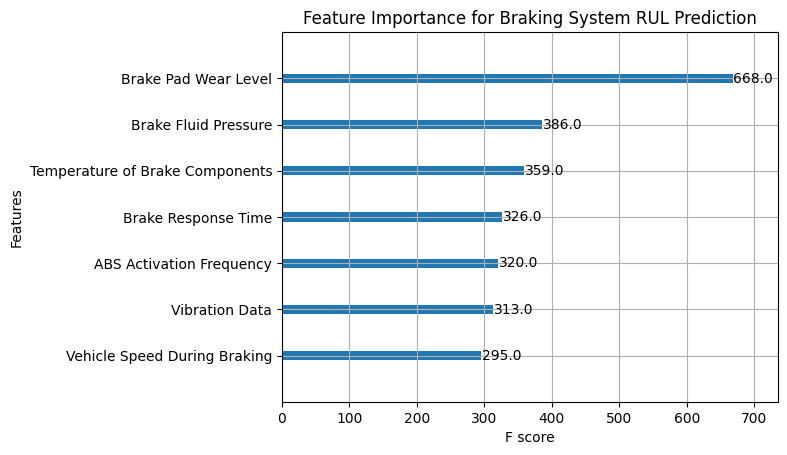

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance

# Load dataset (Ensure the correct path)
data = pd.read_csv('braking_system_rul_dataset.csv')

# Display first few rows of the dataset
print(data.head())

# Split the data into features and target
X = data.drop(columns=['RUL'])  # Replace 'RUL' with the name of your target column
y = data['RUL']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Plot feature importance and save as an image
plt.figure(figsize=(10, 8))
plot_importance(xgb_model)
plt.title("Feature Importance for Braking System RUL Prediction")
plt.savefig('feature_importance_plot.png')  # Save the plot as an image
plt.show()

# Save sample output as CSV
output_df = pd.DataFrame({'Actual RUL': y_test, 'Predicted RUL': y_pred})
output_df.to_csv('rul_prediction_output.csv', index=False)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Or any model you're using

# Assuming your data is in X (features) and y (target RUL)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()  # Or another regressor
model.fit(X_train, y_train)

# Make predictions
y_pred_rul = model.predict(X_test)


In [22]:
y_test_actual = y_test  # Actual RUL values from test set


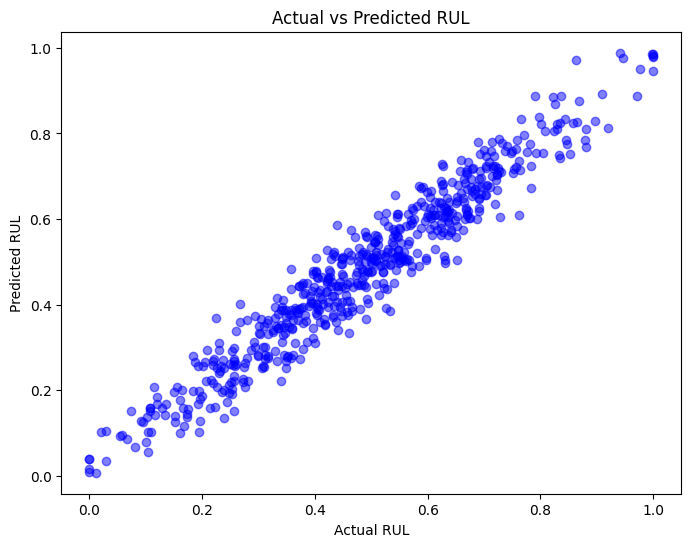

In [23]:
import matplotlib.pyplot as plt

# Now run the plotting code
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_rul, alpha=0.5, color='blue')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
plt.show()


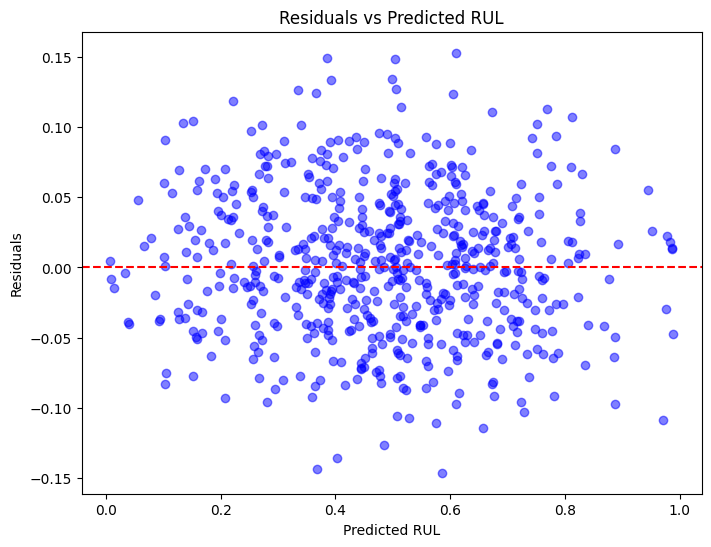

In [24]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test_actual - y_pred_rul

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rul, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y = 0 for reference
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted RUL")
plt.show()


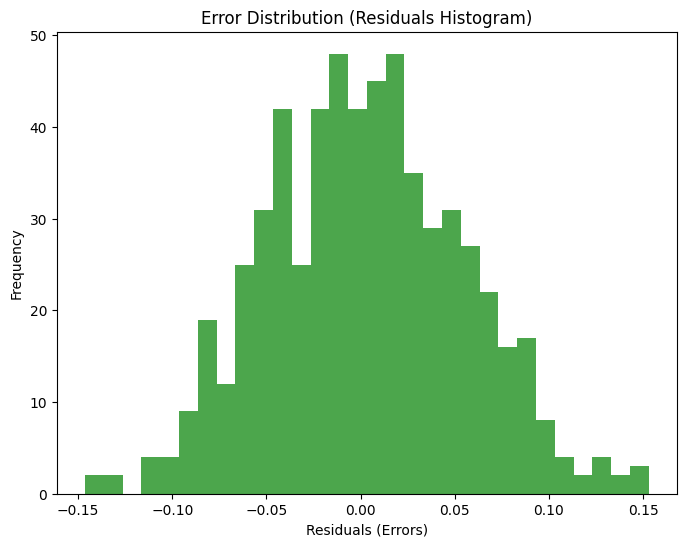

In [25]:
# Plot the distribution of residuals (errors)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='green')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Error Distribution (Residuals Histogram)")
plt.show()


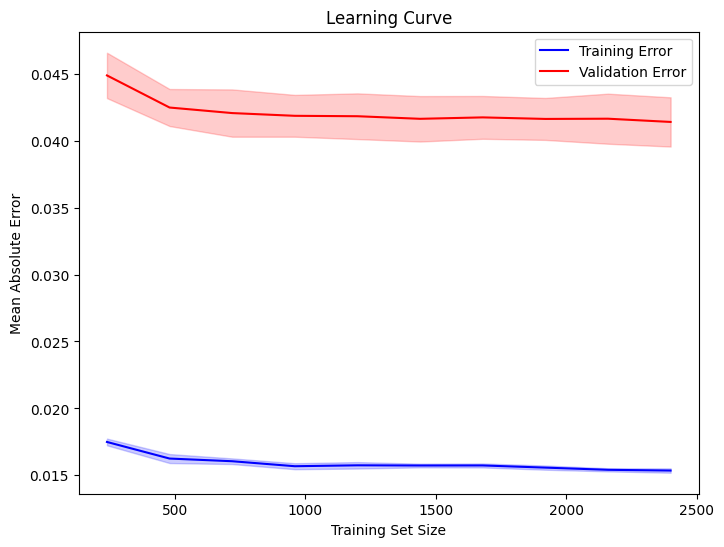

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_absolute_error'
)

# Mean and standard deviation of training and test scores
train_mean = -train_scores.mean(axis=1)  # Negate because MAE was negative in learning_curve
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Error', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve")
plt.legend()
plt.show()
